Objectives: Visualize and interpret the logistic regression model
*   Plot tweets in a scatter plot using their positive and negative sums.
*   Plot the output of the logistic regression model in the same plot as a solid line


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 The CSV contains pre calculated features of the tweeter.

In [2]:
data = pd.read_csv('/content/logistic_features.csv')
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [8]:
# extract feature in to X and y

X_df = data.drop(['sentiment'], axis = 1)
X = X_df.values

print(X.shape) # Print the shape of the X part
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [9]:
Y = data['sentiment'].values
print(Y.shape)
print(Y)

(8000,)
[1. 1. 1. ... 0. 0. 0.]


In [10]:
# a pre-trained regressionn model
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

Text(0, 0.5, 'Negative')

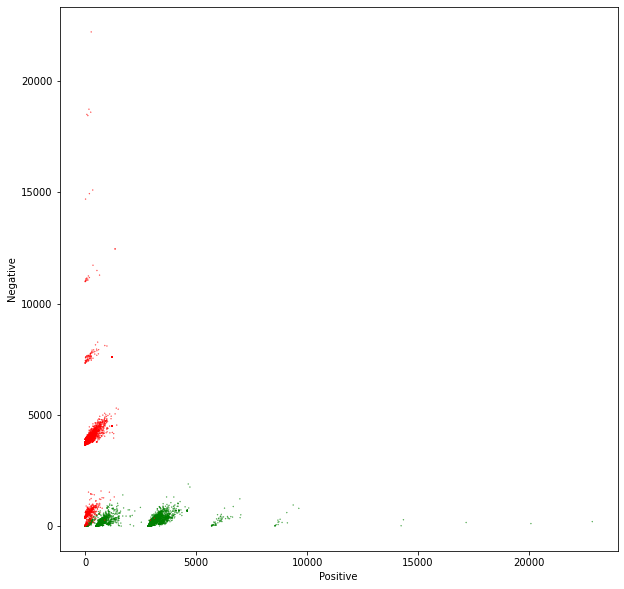

In [13]:
# plot the data points

plt.figure(figsize = (10,10))
colors = ['red', 'green']

# Color based on the sentiment Y
plt.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

plot the model: Separation line has a equation of 
*   𝑛𝑒𝑔=(−𝜃0−𝜃1∗𝑝𝑜𝑠)/𝜃2
red and green lines that point in the direction of the corresponding sentiment has a direction of
*   𝑑𝑖𝑟𝑒𝑐𝑡𝑖𝑜𝑛=𝑝𝑜𝑠∗𝜃2/𝜃

In [16]:
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

def direction(theta, pos):
    return    pos * theta[2] / theta[1]

In [19]:
maxpos = np.max(X[:,1])
print(maxpos)

22847.0


In [21]:
print([0,  maxpos])

[0, 22847.0]


In [20]:
print([neg(theta, 0),   neg(theta, maxpos)])

[0.00010809935328552507, 22023.837391422538]


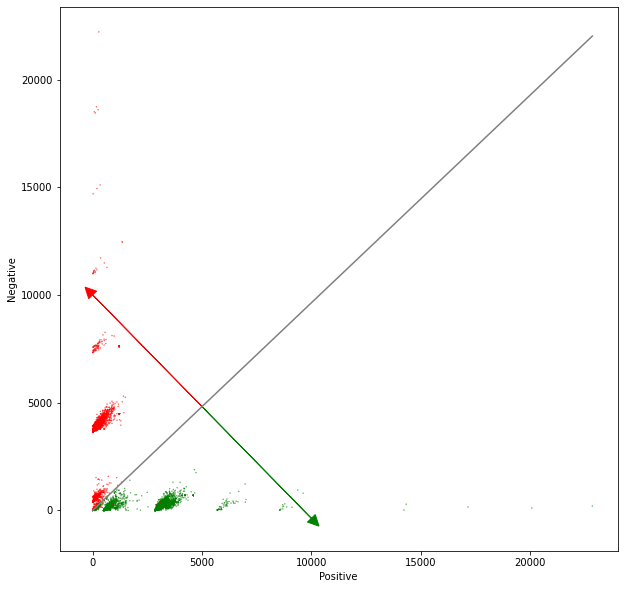

In [22]:
## plot the data points

plt.figure(figsize = (10,10))
colors = ['red', 'green']

plt.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

## Represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])   # 22847.0
offset = 5000 

# Gray line that divides the 2 areas.
plt.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') # x = [0, 22847.0], y = [0.00010809935328552507, 22023.837391422538]
plt.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')  # Green line pointing to the positive direction
plt.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')  # Red line pointing to the negative direction

plt.show()